In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
from scipy.stats import skew, skewnorm
from pycaret.regression import setup, compare_models

In [94]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission_exemple = pd.read_csv('gender_submission.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [95]:
submission_exemple

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [96]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

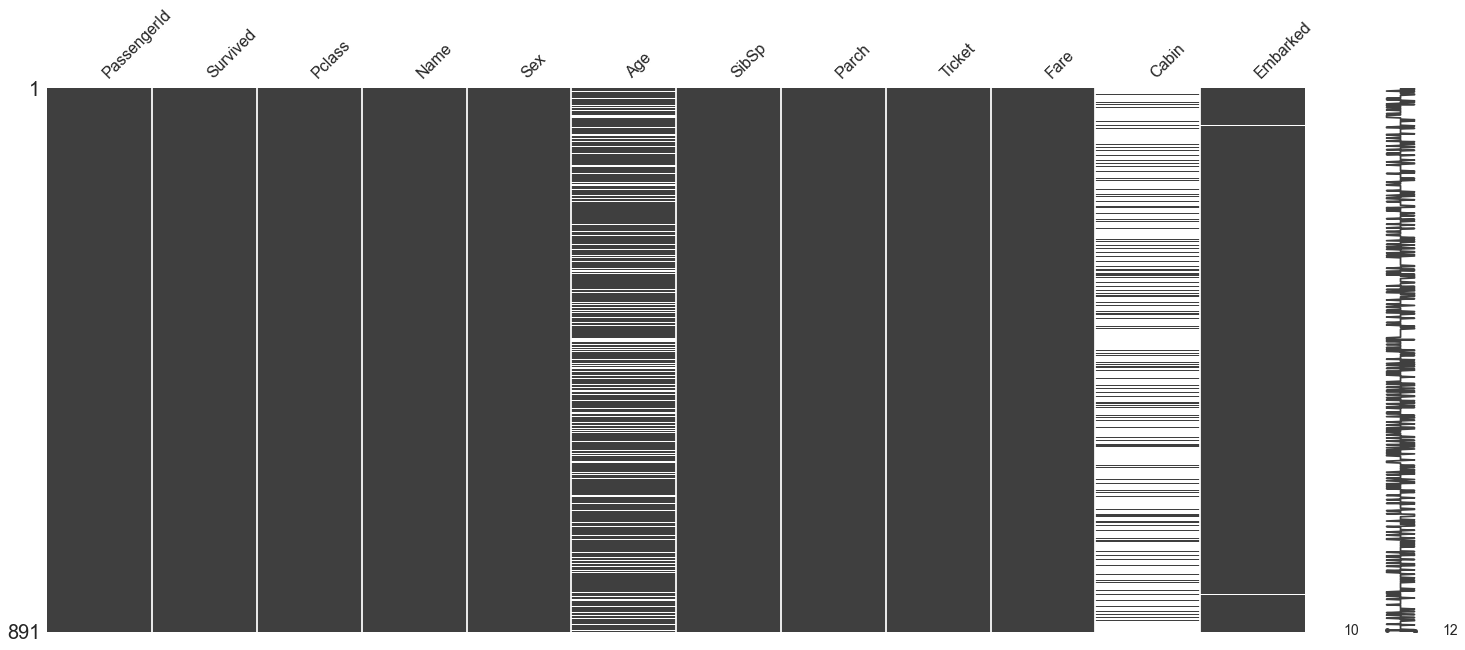

In [97]:
missingno.matrix(train)

In [98]:
#Missing values: Age, Cabin, Embarked

In [99]:
train.shape

(891, 12)

In [100]:
# Drop Cabin. PassagerId as index

In [101]:
train1 = train.drop(['Cabin','Ticket'], axis=1).set_index('PassengerId')

In [102]:
train1.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S


<AxesSubplot:>

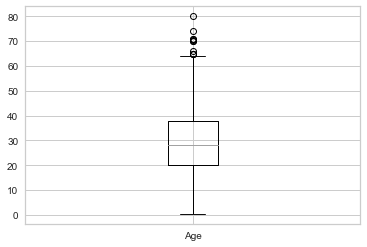

In [103]:
train1.boxplot('Age')

In [104]:
train2 = train1.copy()

In [105]:
train2['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [106]:
#Fill Nan Age with the mean

In [107]:
train2['Age'].fillna((train2['Age'].mean()), inplace=True)

In [108]:
train3 = train2.copy()

In [109]:
train3['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [110]:
train3['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [111]:
# Fill Nan Embarked with the mode

In [112]:
train3['Embarked'].fillna((train3['Embarked'].mode()[0]), inplace=True)

In [113]:
train3.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:>

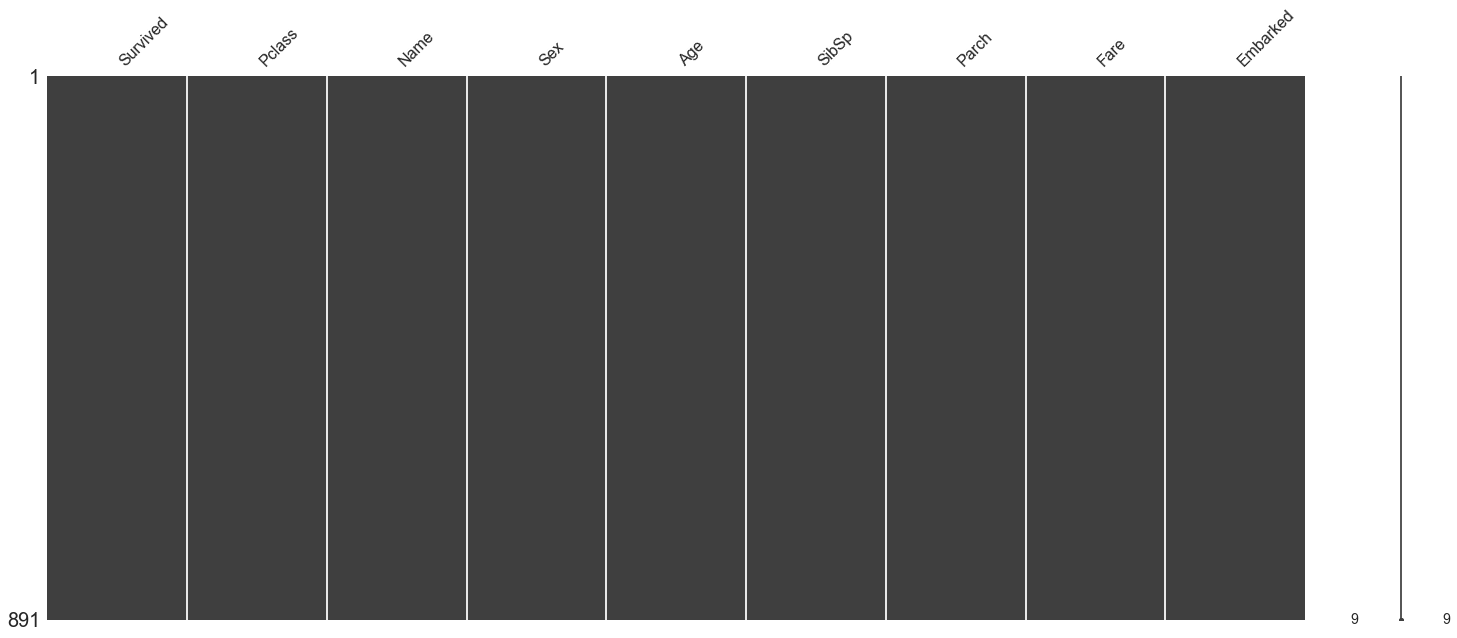

In [114]:
missingno.matrix(train3)

In [115]:
train4 = train3.copy()

In [116]:
train4.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


(<AxesSubplot:xlabel='Fare', ylabel='Density'>,)

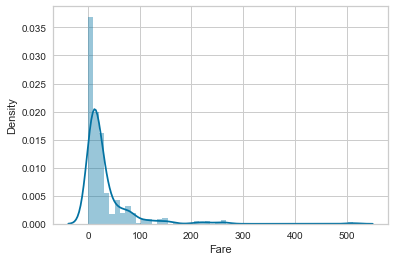

In [117]:

sns.distplot(train4['Fare'], label = 'Skewness: %.2f'%(train4['Fare'].skew())),

<AxesSubplot:xlabel='Fare', ylabel='Density'>

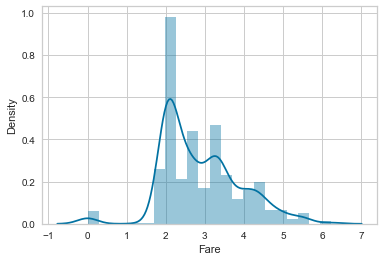

In [118]:
train4['Fare'] = train4['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
sns.distplot(train4['Fare'], label = 'Skewness: %.2f'%(train4['Fare'].skew()))

In [119]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

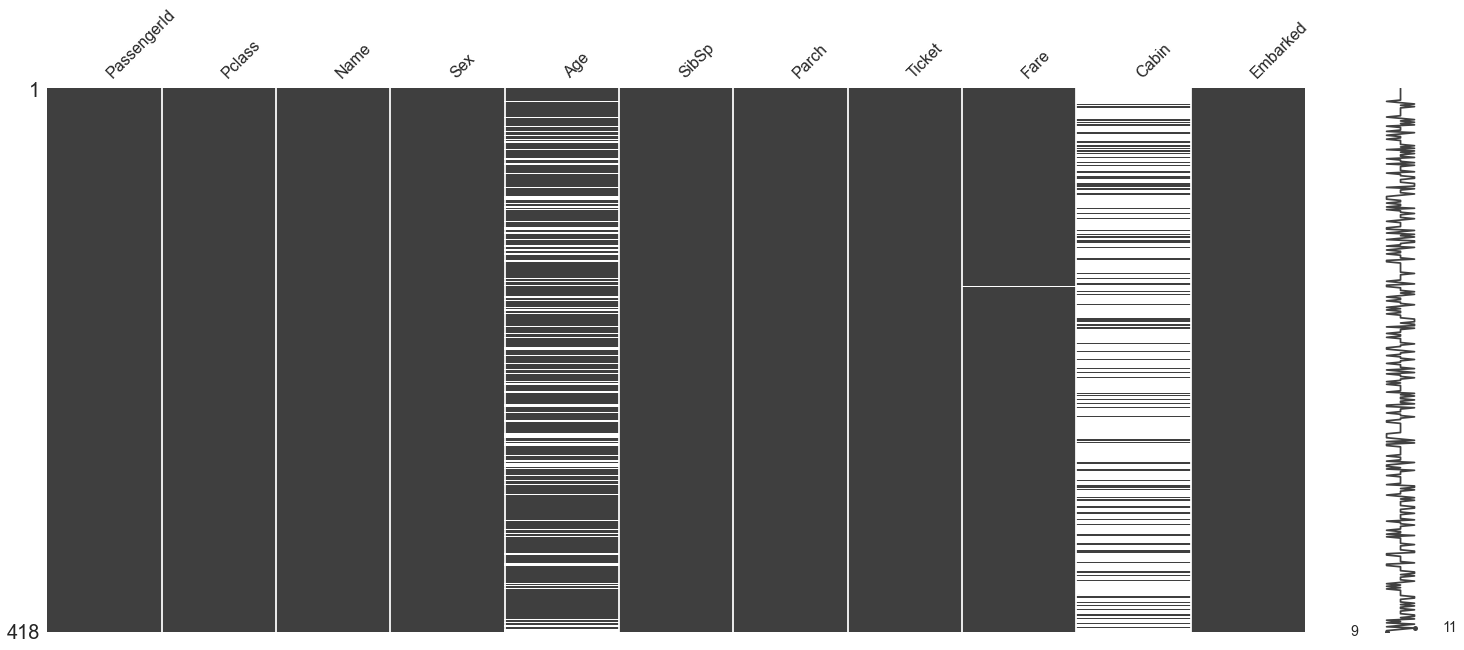

In [120]:
missingno.matrix(test)

In [121]:
# Ajustments in test set

In [122]:
test = test.drop(['Cabin', 'Ticket'], axis=1).set_index('PassengerId')
test['Age'].fillna(test['Age'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)


<AxesSubplot:>

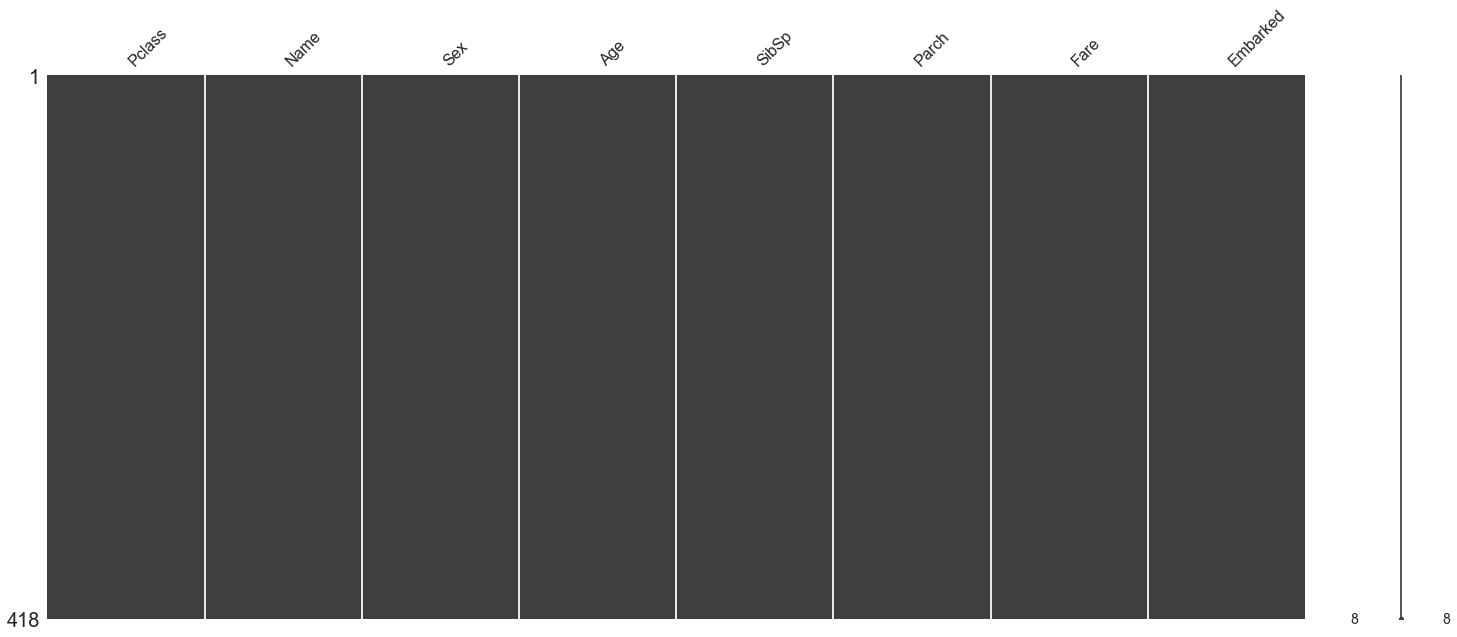

In [123]:
missingno.matrix(test)

<AxesSubplot:>

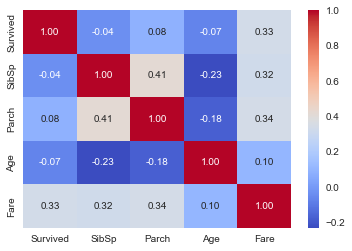

In [124]:
sns.heatmap(train4[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot= True, fmt = '.2f', cmap = 'coolwarm')

In [125]:
train4[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [126]:
train4['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [127]:
train4[['Sex','Survived' ]].groupby('Sex', as_index=False).mean().sort_values(by = 'Survived')

,Sex,Survived
1,male,0.188908
0,female,0.742038


In [128]:
train4['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [129]:
train4[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


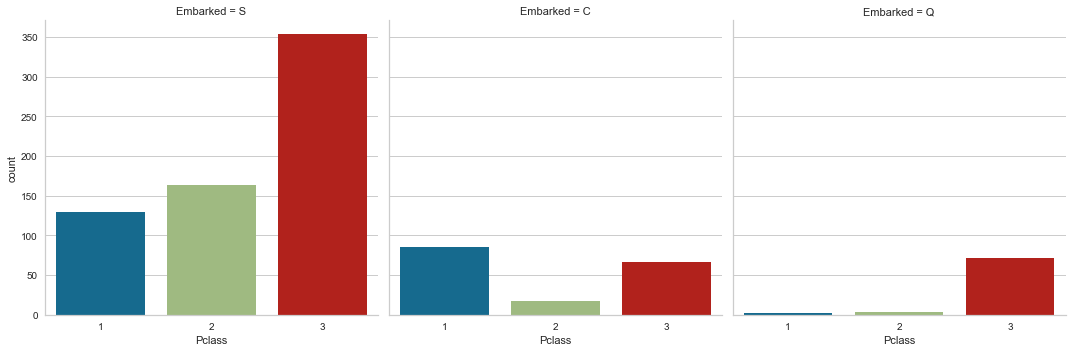

In [130]:
sns.factorplot('Pclass', col = 'Embarked', data=train4, kind='count')

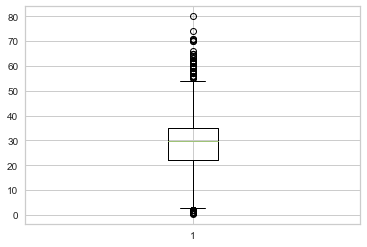

In [131]:
plt.boxplot(train4['Age'])
plt.show()

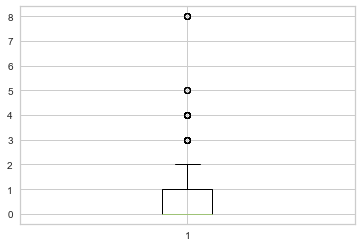

In [132]:
plt.boxplot(train4['SibSp'])
plt.show()

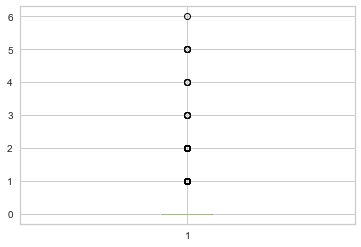

In [133]:
plt.boxplot(train4['Parch'])
plt.show()

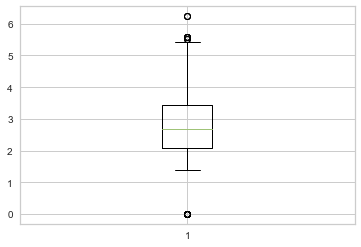

In [134]:
plt.boxplot(train4['Fare'])
plt.show()

In [135]:
train4['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [136]:
train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Text(0.5, 1.0, 'Survival probability by SibSp')

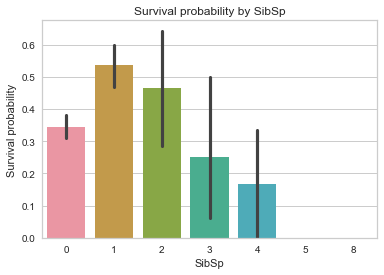

In [137]:
sns.barplot(x = 'SibSp', y='Survived', data= train)
plt.ylabel('Survival probability')
plt.title('Survival probability by SibSp')

In [138]:
train4['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [139]:
train4[['Parch', 'Survived']].groupby('Parch', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [140]:
combine = pd.concat([train4, test], axis = 0).reset_index(drop=True)
combine.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1.981001,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,4.266662,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,2.070022,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,3.972177,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,2.085672,S


In [141]:
combine.isnull().sum().sort_values(ascending=False)

Survived    418
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [142]:
# Convert Sex into numerical values. 0 = male, 1 = female

In [143]:
combine['Sex'] = combine['Sex'].map({'male':0, 'female':1})

Text(0.5, 1.0, 'Passenger Fare Distribution')

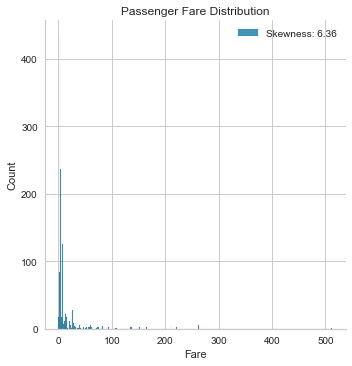

In [144]:
sns.displot(combine['Fare'], label='Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc='best')
plt.title('Passenger Fare Distribution')

In [145]:
combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

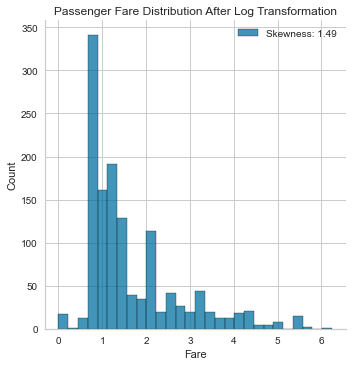

In [146]:
sns.displot(combine['Fare'], label='Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc='best')
plt.title('Passenger Fare Distribution After Log Transformation')

In [147]:
combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [148]:
combine['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [149]:
combine['Title'].nunique()

18

In [150]:
combine['Title'] = combine['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess', 'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs' )

<AxesSubplot:xlabel='Title', ylabel='count'>

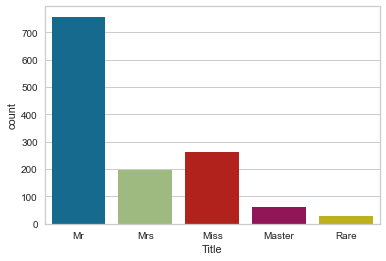

In [151]:
sns. countplot(combine['Title'])

In [152]:
combine[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


Text(0.5, 1.0, 'Mean of survival by Title')

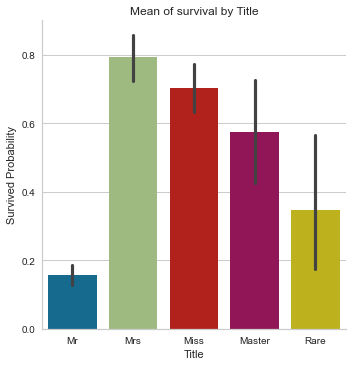

In [153]:
sns.factorplot(x='Title', y='Survived', data = combine, kind = 'bar')
plt.ylabel('Survived Probability')
plt.title('Mean of survival by Title')

In [154]:
combine = combine.drop('Name', axis =1)
combine.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,0,22.0,1,0,0.683603,S,Mr
1,1.0,1,1,38.0,1,0,1.450832,C,Mrs
2,1.0,3,1,26.0,0,0,0.727559,S,Miss
3,1.0,1,1,35.0,1,0,1.379314,S,Mrs
4,0.0,3,0,35.0,0,0,0.735091,S,Mr


In [155]:
combine['Familysize'] = combine['SibSp'] + combine['Parch'] +1
combine[['SibSp', 'Parch', 'Familysize']].head(10)

,SibSp,Parch,Familysize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [156]:
combine[['Familysize', 'Survived']].groupby('Familysize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Familysize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [157]:
combine['IsAlone'] = 0
combine.loc[combine['Familysize'] == 1, 'IsAlone'] = 1

In [158]:
combine[['IsAlone', 'Survived']].groupby('IsAlone', as_index=False).mean().sort_values(by = 'Survived', ascending=False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [159]:
combine = combine.drop(['SibSp', 'Parch', 'Familysize'], axis=1)
combine.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0.0,3,0,22.0,0.683603,S,Mr,0
1,1.0,1,1,38.0,1.450832,C,Mrs,0
2,1.0,3,1,26.0,0.727559,S,Miss,1
3,1.0,1,1,35.0,1.379314,S,Mrs,0
4,0.0,3,0,35.0,0.735091,S,Mr,1


In [160]:
combine['AgeBand'] = pd.cut(combine['Age'], 5)
combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by='AgeBand') 

,AgeBand,Survived
0,"(0.0902, 16.136]",0.550000
1,"(16.136, 32.102]",0.344168
2,"(32.102, 48.068]",0.404255
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [161]:
combine.loc[combine['Age'] <= 16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age'] > 64.034 , 'Age'] = 4

In [162]:
combine = combine.drop('AgeBand', axis=1)

In [163]:
combine[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [164]:
combine['Age'] = combine['Age'].astype(int)
combine['Age'].dtype

dtype('int32')

In [165]:
combine['Age*Class'] = combine['Age'] * combine['Pclass']
combine[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


In [166]:
combine.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0.0,3,0,1,0.683603,S,Mr,0,3
1,1.0,1,1,2,1.450832,C,Mrs,0,2
2,1.0,3,1,1,0.727559,S,Miss,1,3
3,1.0,1,1,2,1.379314,S,Mrs,0,2
4,0.0,3,0,2,0.735091,S,Mr,1,6


In [169]:
combine = pd.get_dummies(combine, columns=['Title'])
combine = pd.get_dummies(combine, columns=['Embarked'], prefix= 'Em')
combine.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0.0,3,0,1,0.683603,0,3,0,0,1,0,0,0,0,1
1,1.0,1,1,2,1.450832,0,2,0,0,0,1,0,1,0,0
2,1.0,3,1,1,0.727559,1,3,0,1,0,0,0,0,0,1
3,1.0,1,1,2,1.379314,0,2,0,0,0,1,0,0,0,1
4,0.0,3,0,2,0.735091,1,6,0,0,1,0,0,0,0,1


In [173]:
combine['FareBand'] = pd.cut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by ='FareBand')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.365135
1,"(1.56, 3.119]",0.761905
2,"(3.119, 4.679]",NaN
3,"(4.679, 6.239]",NaN


In [179]:
combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119),  'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

In [180]:
combine['Fare'] = combine['Fare'].astype('int') 

In [182]:
combine = combine.drop('FareBand', axis=1)

In [183]:
combine.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0.0,3,0,1,0,0,3,0,0,1,0,0,0,0,1
1,1.0,1,1,2,0,0,2,0,0,0,1,0,1,0,0
2,1.0,3,1,1,0,1,3,0,1,0,0,0,0,0,1
3,1.0,1,1,2,0,0,2,0,0,0,1,0,0,0,1
4,0.0,3,0,2,0,1,6,0,0,1,0,0,0,0,1


In [184]:
train = combine[:len(train)]
test = combine[len(train):]

In [185]:
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0.0,3,0,1,0,0,3,0,0,1,0,0,0,0,1
1,1.0,1,1,2,0,0,2,0,0,0,1,0,1,0,0
2,1.0,3,1,1,0,1,3,0,1,0,0,0,0,0,1
3,1.0,1,1,2,0,0,2,0,0,0,1,0,0,0,1
4,0.0,3,0,2,0,1,6,0,0,1,0,0,0,0,1


In [186]:
train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,0,0,3,0,0,1,0,0,0,0,1
1,1,1,1,2,0,0,2,0,0,0,1,0,1,0,0
2,1,3,1,1,0,1,3,0,1,0,0,0,0,0,1
3,1,1,1,2,0,0,2,0,0,0,1,0,0,0,1
4,0,3,0,2,0,1,6,0,0,1,0,0,0,0,1


In [187]:
test.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
891,NaN,3,0,2,1,1,6,0,0,1,0,0,0,1,0
892,NaN,3,1,2,1,0,6,0,0,0,1,0,0,0,1
893,NaN,2,0,3,1,1,6,0,0,1,0,0,0,1,0
894,NaN,3,0,1,1,1,3,0,0,1,0,0,0,0,1
895,NaN,3,1,1,1,0,3,0,0,0,1,0,0,0,1


In [188]:
test = test.drop('Survived', axis=1)
test.head()

,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
891,3,0,2,1,1,6,0,0,1,0,0,0,1,0
892,3,1,2,1,0,6,0,0,0,1,0,0,0,1
893,2,0,3,1,1,6,0,0,1,0,0,0,1,0
894,3,0,1,1,1,3,0,0,1,0,0,0,0,1
895,3,1,1,1,0,3,0,0,0,1,0,0,0,1
